<a href="https://colab.research.google.com/github/Ethancatepete/Project/blob/main/Predicting_nails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data


In [2]:
!ls '/content/drive/MyDrive/Nail'

'Acral lentiginous melanoma'  'Koilonychia - spoon nails'   Psoriasis
"Beau's lines"		      'Leukonychia - white nails'  'Yellow Nails'
'Clubbed nails'		      'Normal Nails'
 Cyanosis		       Paronychia


In [3]:
data_dir = '/content/drive/MyDrive/Nail'

In [4]:
!ls '/content/drive/MyDrive/Nail'
nail_names = ['Acral lentiginous melanoma', "Beau's lines", 'Clubbed nails', 'Cyanosis', 'Koilonychia - spoon nails', 'Leukonychia - white nails', 
              'Normal Nails', 'Paronychia', 'Psoriasis', 'Yellow Nails']

'Acral lentiginous melanoma'  'Koilonychia - spoon nails'   Psoriasis
"Beau's lines"		      'Leukonychia - white nails'  'Yellow Nails'
'Clubbed nails'		      'Normal Nails'
 Cyanosis		       Paronychia


In [7]:
#Generator
data = tf.keras.utils.image_dataset_from_directory(data_dir, labels = 'inferred', label_mode = "categorical",
                                                   class_names = nail_names, batch_size=20, 
                                                   image_size=(128, 128))

Found 160 files belonging to 10 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[1][0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#One hot encoding classes
for classes, nails in enumerate(nail_names):
  print(classes, nails)

0 Acral lentiginous melanoma
1 Beau's lines
2 Clubbed nails
3 Cyanosis
4 Koilonychia - spoon nails
5 Leukonychia - white nails
6 Normal Nails
7 Paronychia
8 Psoriasis
9 Yellow Nails


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


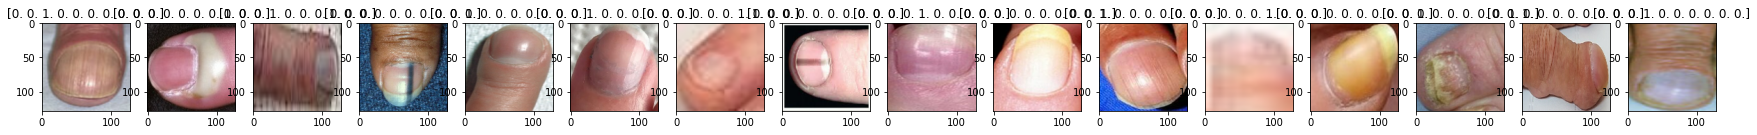

In [16]:
fig, ax = plt.subplots(ncols = 16, figsize=(30, 30))
for classes, img in enumerate(batch[0][:16]):
  ax[classes].imshow(img.astype(int))
  ax[classes].title.set_text(batch[1][classes])

#Preprocces data 

In [ ]:
batch[0].max()

255.0

In [ ]:
batch[0].shape

(20, 128, 128, 3)

In [ ]:
data = data.map(lambda img, classes: (img/255, classes))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
train_size = int(len(data)* 0.5)
val_size = int(len(data)* 0.3)
test_size = int(len(data)* 0.2)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#Building model

In [ ]:
from tensorflow.keras.layers import *

tf.keras.backend.clear_session()

INPUT_SHAPE = [128, 128, 3]

##pooling = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (1,1))(layer1)
#-------
inputs = tf.keras.Input(shape=INPUT_SHAPE)
layer1 = tf.keras.layers.Conv2D(filters = 2, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(inputs)
pooling = tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides=(1,1))(layer1)



flattening = tf.keras.layers.Flatten()(pooling)

densed = tf.keras.layers.Dense(units=10, activation = 'softmax')(flattening)


model = tf.keras.Model(inputs = inputs, outputs = densed)



optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)



model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"]
              )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 2)       56        
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 2)      0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 32258)             0         
                                                                 
 dense (Dense)               (None, 10)                322590    
                                                                 
Total params: 322,646
Trainable params: 322,646
Non-trainable params: 0
_______________________________________________________

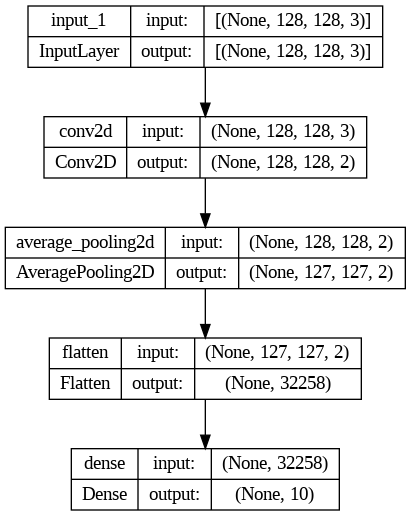

In [ ]:
tf.keras.utils.plot_model(model, "my_model.png", show_shapes = True)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train, epochs = 50, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/50
4/4 [==============================] - 9s 149ms/step - loss: 10.5001 - accuracy: 0.1250 - val_loss: 7.5095 - val_accuracy: 0.1500
Epoch 2/50
4/4 [==============================] - 1s 111ms/step - loss: 7.9720 - accuracy: 0.0750 - val_loss: 6.1156 - val_accuracy: 0.2250
Epoch 3/50
4/4 [==============================] - 1s 96ms/step - loss: 6.3430 - accuracy: 0.1500 - val_loss: 5.3492 - val_accuracy: 0.2000
Epoch 4/50
4/4 [==============================] - 1s 98ms/step - loss: 5.3024 - accuracy: 0.0500 - val_loss: 3.7178 - val_accuracy: 0.2000
Epoch 5/50
4/4 [==============================] - 1s 103ms/step - loss: 3.6745 - accuracy: 0.1625 - val_loss: 3.3938 - val_accuracy: 0.1000
Epoch 6/50
4/4 [==============================] - 1s 111ms/step - loss: 3.1012 - accuracy: 0.1250 - val_loss: 2.7824 - val_accuracy: 0.2000
Epoch 7/50
4/4 [==============================] - 1s 105ms/step - loss: 2.5238 - accuracy: 0.1250 - val_loss: 2.3896 - val_accuracy: 0.2750
Epoch 8/50
4/4 [=====

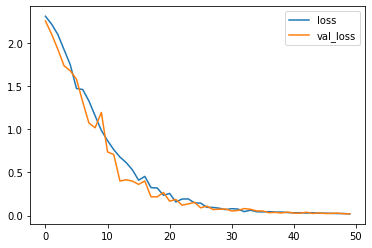

In [ ]:
res = pd.DataFrame(hist.history)
res[['loss','val_loss']].plot()

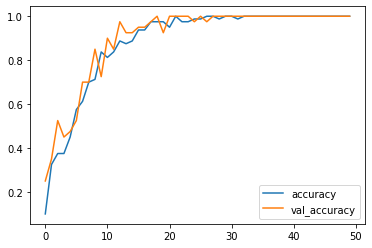

In [ ]:
res[['accuracy','val_accuracy']].plot()

#Save model / Load model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/Models/Nail_Model2.h5')

In [ ]:
!ls '/content/drive/MyDrive'

 assets
 Classroom
'Colab Notebooks'
'History Channel Mankind The Story of All of Us Episode 8_12 Treasure.mp4'
 keras_metadata.pb
 Models
'Models (1)'
'MO Space 1st Feb 2013.gdoc'
 Nail
'Nail (Preliminary)'
 saved_model.pb
 variables


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Models/Nail_Model.h5')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 2)       56        
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 2)      0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 32258)             0         
                                                                 
 dense (Dense)               (None, 10)                322590    
                                                                 
Total params: 322,646
Trainable params: 322,646
Non-trainable params: 0
_______________________________________________________

#Evaluate model

In [ ]:
test.as_numpy_iterator().next()[1]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
scores = model.evaluate(test, verbose=1)   #calling model.evaluate()
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

1/1 [==============================] - 0s 307ms/step - loss: 0.1737 - accuracy: 1.0000
loss: 0.1737
accuracy: 1.0000


**Test on test set**


In [ ]:
prediction = model.predict(test) #calling model.predict() here


print(
    f'sum: {np.sum(prediction, axis=1)}\n'
    f'predict index: {np.argmax(prediction, axis=1)}'
)

1/1 [==============================] - 0s 282ms/step
sum: [1.         0.99999994 0.99999994 1.         1.0000001  0.99999994
 0.99999994 0.99999994 1.         1.         0.99999994 0.99999994
 1.0000001  1.         1.         1.         1.         1.
 0.99999994 1.        ]
predict index: [9 5 1 9 4 6 4 2 1 1 5 3 5 1 8 9 0 3 9 3]


In [ ]:
prediction.shape

(20, 10)